# Class mapping Assignment

#### Load python tools

In [46]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [47]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [48]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [50]:
counties_election_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/notebooks/master/elections/data/ca_counties_election_results_2020.csv"
)

In [51]:
counties_election_df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,winner
0,California,1,Alameda,136309,617659,769864,-481350,0.177056,0.802296,0.625240,Biden
1,California,3,Alpine,244,476,741,-232,0.329285,0.642375,0.313090,Biden
2,California,5,Amador,13585,8153,22302,5432,0.609138,0.365573,0.243566,Trump
3,California,7,Butte,48730,50426,102042,-1696,0.477548,0.494169,0.016621,Biden
4,California,9,Calaveras,16518,10046,27164,6472,0.608084,0.369828,0.238257,Trump


#### Read county boundaries

In [52]:
counties_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/counties_simple.geojson"
)

In [53]:
counties_gdf.head()

,county_name,county_fips,geometry
0,Alameda,001,"POLYGON ((-122.27125 37.90503, -122.27024 37.9..."
1,Alpine,003,"POLYGON ((-119.58667 38.71420, -119.58653 38.7..."
2,Amador,005,"POLYGON ((-120.07246 38.70276, -120.07249 38.6..."
3,Butte,007,"POLYGON ((-121.07661 39.59729, -121.07945 39.5..."
4,Calaveras,009,"POLYGON ((-120.01792 38.43586, -120.01788 38.4..."


<AxesSubplot:>

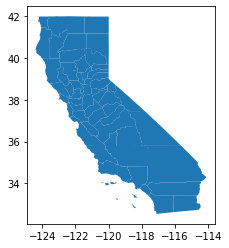

In [54]:
counties_gdf.plot()

#### Merge the two 

In [55]:
merged_counties_gdf = pd.merge(counties_gdf, counties_election_df, on="county_name")

<AxesSubplot:>

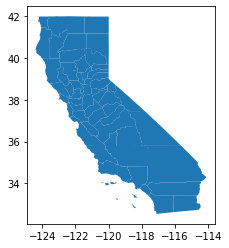

In [56]:
merged_counties_gdf.plot()

#### Export merged geo file

In [57]:
merged_counties_gdf.to_file("data/election_counties.geojson", driver="GeoJSON")